### AIM

This notebook uses Fashion MNIST dataset to perform multi-label classification using a simple convolutional neural network.

Steps:
1. Import Dependencies
2. Load data and split it into training and test sets
3. Preprocessing
4. Create Neural Network
5. Train
6. Evaluate and make predictions on test set. 




In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
#Load in the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train shape: ", x_train.shape)

x_train shape:  (60000, 28, 28)


In [4]:
# the images are 2D grayscale images 
# But convolution expects 3D (height, width, channels)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# number of classes

k = len(set(y_train))
print("Number of classes: ", k)
print(set(y_train))

Number of classes:  10
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)


In [8]:
# Compile and fit

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 29s 487us/sample - loss: 0.5257 - accuracy: 0.8070 - val_loss: 0.4015 - val_accuracy: 0.8508
Epoch 2/15
60000/60000 [==============================] - 25s 411us/sample - loss: 0.3618 - accuracy: 0.8639 - val_loss: 0.3610 - val_accuracy: 0.8715
Epoch 3/15
60000/60000 [==============================] - 22s 360us/sample - loss: 0.3132 - accuracy: 0.8831 - val_loss: 0.3201 - val_accuracy: 0.8841
Epoch 4/15
60000/60000 [==============================] - 22s 363us/sample - loss: 0.2786 - accuracy: 0.8948 - val_loss: 0.3191 - val_accuracy: 0.8863
Epoch 5/15
60000/60000 [==============================] - 21s 352us/sample - loss: 0.2549 - accuracy: 0.9034 - val_loss: 0.2903 - val_accuracy: 0.8924
Epoch 6/15
60000/60000 [==============================] - 26s 426us/sample - loss: 0.2308 - accuracy: 0.9123 - val_loss: 0.2989 - val_accuracy: 0.8944
Epoch 7/15
60000/60000 [====================

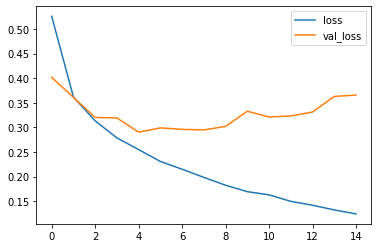

In [9]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

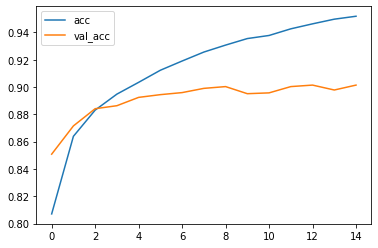

In [10]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


Confusion matrix, without normalizaion
[[877   2  20  16   4   3  70   0   8   0]
 [  2 975   1  13   4   0   3   0   2   0]
 [ 24   0 855  11  59   0  49   0   2   0]
 [ 17   5  13 916  31   0  18   0   0   0]
 [  1   0  46  30 815   0 104   0   4   0]
 [  0   0   0   1   0 969   0  22   1   7]
 [119   2  68  21  72   0 711   0   7   0]
 [  0   0   0   0   0   5   0 960   1  34]
 [  5   0   3   3   5   1   8   3 972   0]
 [  1   0   0   0   0   8   0  26   1 964]]


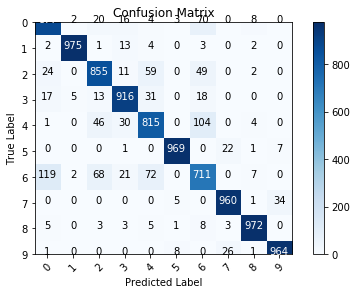

In [11]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', 
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.Normalization can be 
    applied by setting 'normalize=True'
    """
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalizaion")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', 
                 color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

    

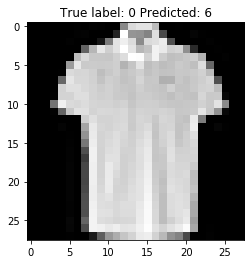

In [14]:
#Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [19]:
#Label mapping

labels = '''T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag AnkleBoot'''.split()

In [20]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'AnkleBoot']

It confuses T-shirt/top with a shirt which kind of makes sense. 